In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [2]:
#Load the data and store the data into a data frame
data = pd.read_csv('TSLA Training.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2,2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
3,2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
4,2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


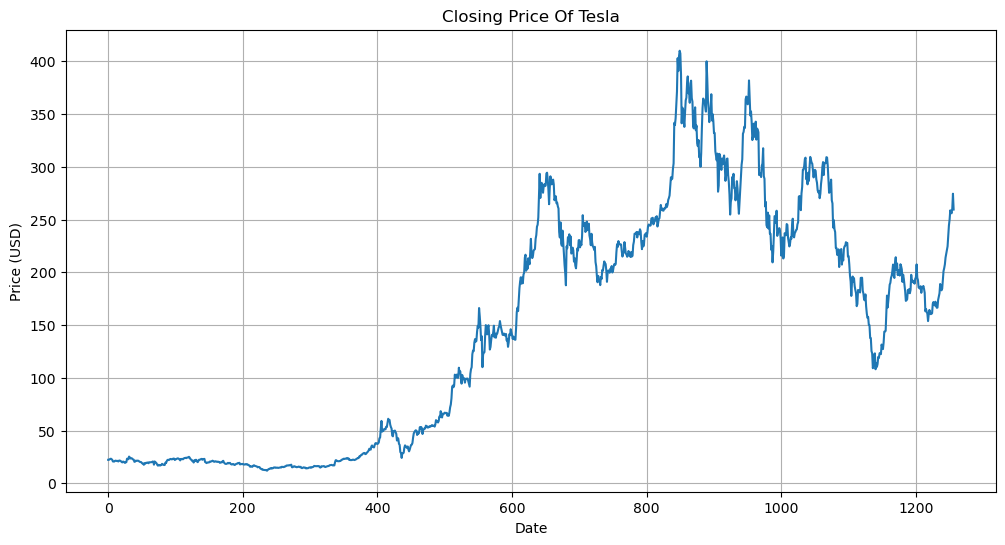

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title("Closing Price Of Tesla")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
#Plotting moving averages of 100 day
ma100 = data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1252    188.0117
1253    189.1332
1254    190.2997
1255    191.5999
1256    192.5918
Name: Close, Length: 1257, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

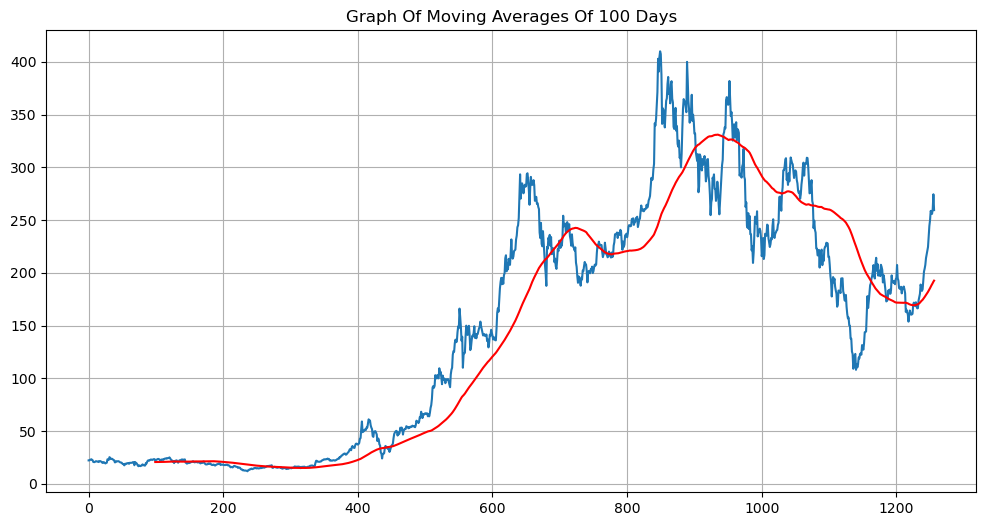

In [6]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [7]:
#Defining 200 days moving averages and plotting comparision graph with 100 days moving averages
ma200 = data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1252    196.02555
1253    195.88095
1254    195.79515
1255    195.78935
1256    195.70085
Name: Close, Length: 1257, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

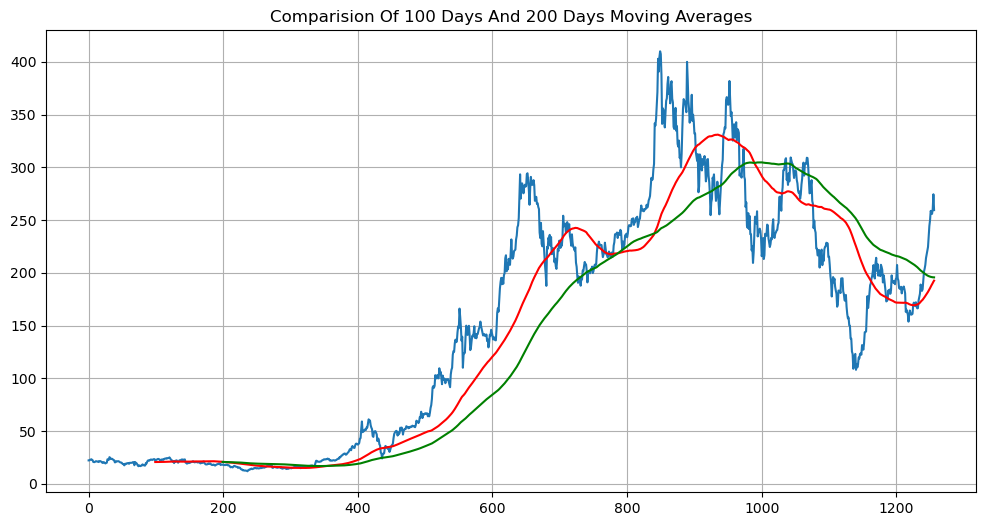

In [8]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [9]:
#Get the number of rows and columns in the data set
data.shape

(1257, 7)

In [10]:
#Spliting the dataset into training (70%) and testing (30%) set
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(879, 7)
(378, 7)


In [11]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2,2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
3,2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
4,2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


In [12]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
879,2021-12-17,304.923340,320.220001,303.013336,310.856659,310.856659,100437300
880,2021-12-20,303.566681,307.230011,297.796661,299.980011,299.980011,56480100
881,2021-12-21,305.623322,313.166656,295.373322,312.843323,312.843323,71517900
882,2021-12-22,321.886658,338.553345,319.016663,336.290009,336.290009,93634200
883,2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200


In [13]:
#Create the training and testing data set
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [14]:
#Using MinMax scaler for normalization of the dataset
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02590368],
       [0.02579984],
       [0.02730555],
       [0.02772428],
       [0.02863374],
       [0.02746467],
       [0.02614486],
       [0.02208998],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403451],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407136],
       [0.02426565],
       [0.02365934],
       [0.02254555],
       [0.02080702],
       [0.01984062],
       [0.02173491],
       [0.02138486],
       [0.01979875],
       [0.01862466],
       [0.01995953],
       [0.02041175],
       [0.02856842],
       [0.02833895],
       [0.02730388],
       [0.03359808],
       [0.03205216],
       [0.02905581],
       [0.02956497],
       [0.02971906],
       [0.02825019],
       [0.02675117],
       [0.02620851],
       [0.02119225],
       [0.02168466],
       [0.02393905],
       [0.0238955 ],
       [0.02363757],
       [0.02409314],
       [0.02349855],
       [0.02225747],
       [0.021

In [16]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [17]:
#Convert the X_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [18]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(779, 100, 1)

In [19]:
#Model building(LSTM)
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu' , return_sequences=False ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\ghosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [22]:
#Train the model
history= model.fit(x_train, y_train,epochs = 100,batch_size = 32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 241ms/step - loss: 0.0979 - mean_absolute_error: 0.2233
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - loss: 0.0125 - mean_absolute_error: 0.0790
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - loss: 0.0089 - mean_absolute_error: 0.0617
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 0.0069 - mean_absolute_error: 0.0545
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - loss: 0.0065 - mean_absolute_error: 0.0512
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - loss: 0.0068 - mean_absolute_error: 0.0517
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 0.0066 - mean_absolute_error: 0.0497
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - loss: 0.0062 - mean_absolute_error: 0.0467
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - loss: 0.0069 - mean_absolute_error: 0.0527
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - loss: 0.0061 - mean_absolute_error: 0.0501
Epoch 11/10

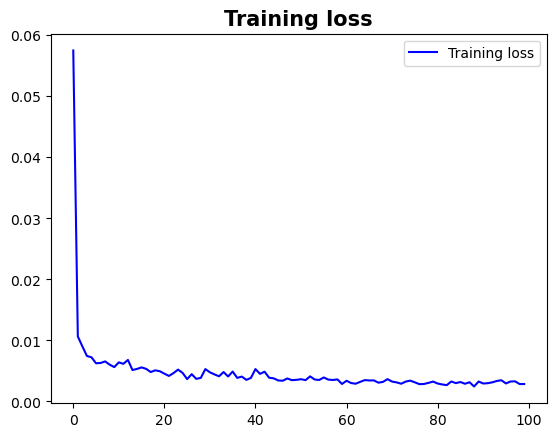

<Figure size 640x480 with 0 Axes>

In [23]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

In [24]:
model.save('my_model.keras')

In [25]:
past_100_days = pd.DataFrame(train_close[-100:])

In [26]:
test_df = pd.DataFrame(test_close)

In [27]:
#Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.
final_data = pd.concat([past_100_days, test_df], ignore_index=True)

In [28]:
final_data.head()

,0
0,215.660004
1,225.783340
2,229.066666
3,236.556671
4,236.580002


In [29]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.35631234],
       [0.38984775],
       [0.40072437],
       [0.4255364 ],
       [0.42561368],
       [0.42691665],
       [0.43101338],
       [0.41386471],
       [0.43005267],
       [0.42588972],
       [0.42349357],
       [0.43942757],
       [0.43381811],
       [0.399587  ],
       [0.37699452],
       [0.40270093],
       [0.38556334],
       [0.39306101],
       [0.42181513],
       [0.42423338],
       [0.42722585],
       [0.4161394 ],
       [0.42802091],
       [0.44899021],
       [0.45430154],
       [0.45250165],
       [0.45062446],
       [0.45192742],
       [0.47329423],
       [0.47434324],
       [0.47543643],
       [0.45490887],
       [0.46234032],
       [0.46398559],
       [0.47650753],
       [0.47778846],
       [0.48054901],
       [0.44817305],
       [0.45834302],
       [0.4722121 ],
       [0.47408929],
       [0.49700204],
       [0.51574082],
       [0.50050246],
       [0.50464331],
       [0.49820568],
       [0.49791857],
       [0.504

In [30]:
input_data.shape

(478, 1)

In [31]:
#Testing the model
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [33]:
#Making prediction and plotting the graph of predicted vs actual values
# Making predictions

y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step


In [34]:
y_pred.shape

(378, 1)

In [35]:
y_test

array([0.67166879, 0.63563789, 0.67824998, 0.75592145, 0.82011017,
       0.84985811, 0.84381798, 0.84130031, 0.82379832, 0.80882502,
       0.9667296 , 0.91130836, 0.84343149, 0.81757046, 0.77589693,
       0.81030465, 0.81723917, 0.86341799, 0.78097636, 0.80090766,
       0.77981689, 0.74132352, 0.74200814, 0.68417972, 0.66883095,
       0.6560219 , 0.67701329, 0.55741435, 0.57646228, 0.67625133,
       0.6702112 , 0.64195401, 0.62592063, 0.66145475, 0.64380911,
       0.65999716, 0.67103937, 0.64072834, 0.59153495, 0.60893767,
       0.66047191, 0.66153199, 0.60958913, 0.58820023, 0.5490553 ,
       0.48557324, 0.52613158, 0.53618003, 0.60305211, 0.59636043,
       0.61349807, 0.56866643, 0.56756217, 0.53033865, 0.55222443,
       0.59039764, 0.56757319, 0.52014665, 0.48814611, 0.52736828,
       0.56970438, 0.60434401, 0.64165588, 0.65906962, 0.73947944,
       0.74514421, 0.76149776, 0.75787592, 0.84753919, 0.85607495,
       0.84991331, 0.83181506, 0.83953357, 0.90673694, 0.84689

In [36]:
y_pred

array([[0.70501333],
       [0.6897674 ],
       [0.67390454],
       [0.6593207 ],
       [0.65086794],
       [0.65386504],
       [0.6706739 ],
       [0.698285  ],
       [0.7306981 ],
       [0.7604776 ],
       [0.78264356],
       [0.80467665],
       [0.82519495],
       [0.83893687],
       [0.8436668 ],
       [0.83883417],
       [0.8291091 ],
       [0.8177349 ],
       [0.80895567],
       [0.80034345],
       [0.7921612 ],
       [0.783691  ],
       [0.77342975],
       [0.76166594],
       [0.747123  ],
       [0.72978675],
       [0.7103023 ],
       [0.69069374],
       [0.6693859 ],
       [0.6468343 ],
       [0.62622947],
       [0.6108999 ],
       [0.6018623 ],
       [0.5977478 ],
       [0.598635  ],
       [0.60294545],
       [0.6098348 ],
       [0.6188097 ],
       [0.6272868 ],
       [0.6314579 ],
       [0.6310778 ],
       [0.62941086],
       [0.6287242 ],
       [0.62758404],
       [0.62419426],
       [0.616778  ],
       [0.6041238 ],
       [0.588

In [37]:
scaler.scale_

array([0.00331268])

In [38]:
scale_factor = 1/0.00331268
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

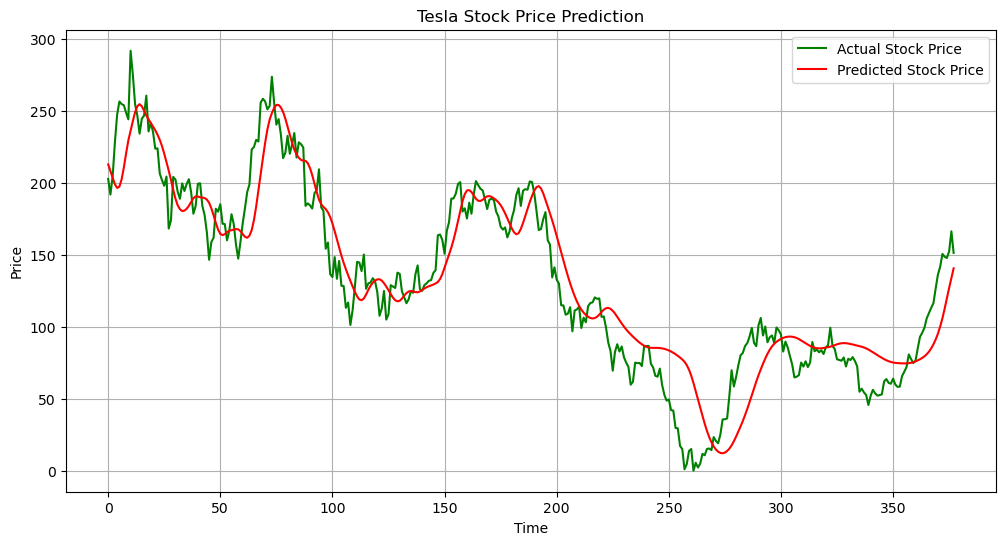

In [39]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'g', label = "Actual Stock Price")
plt.plot(y_pred, 'r', label = "Predicted Stock Price")
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#Model evaluation
#Calculation of mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 14.34%


In [41]:
# Calculate Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 568.4407085892433


In [42]:
Pred = model.predict(x_test)
Pred = scaler.inverse_transform(Pred)
RMSE = np.sqrt(np.mean(Pred - y_test)**2)
RMSE

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


110.049807642358

In [43]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [44]:
#Calculation of R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8642835902396577


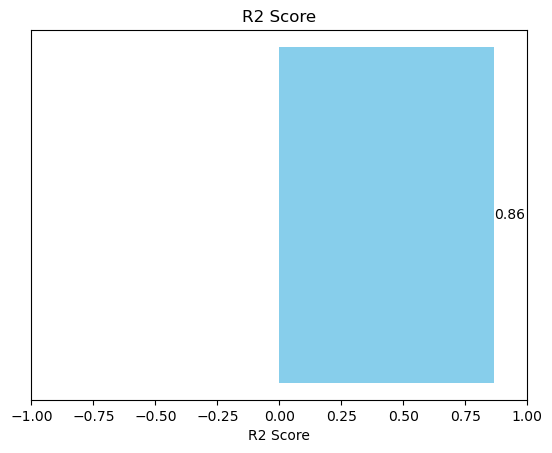

In [45]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show() 

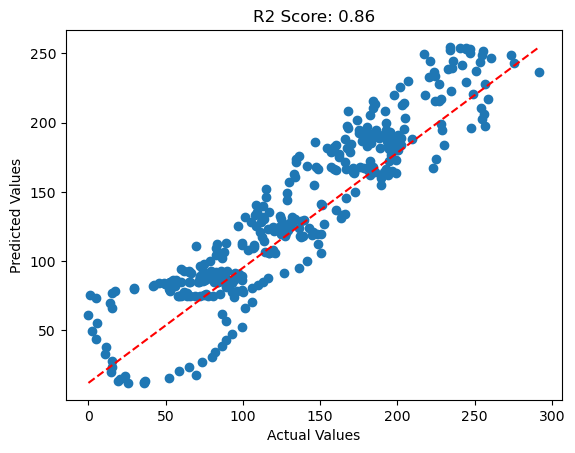

In [46]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [47]:
# Predict future value of 30 days
from tensorflow.keras.models import load_model

model = load_model('keras_model.h5')
last_100_days = data['Close'][-100:].values.reshape(-1, 1)
last_100_days_scaled = scaler.transform(last_100_days)

future_predictions = []
input_seq = last_100_days_scaled

In [48]:
for _ in range(30):
    x_input = input_seq[-100:].reshape(1, 100, 1)
    pred_price = model.predict(x_input, verbose=0)
    future_predictions.append(pred_price[0][0])
    input_seq = np.append(input_seq, pred_price)

In [49]:
# Transforming predictions back to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

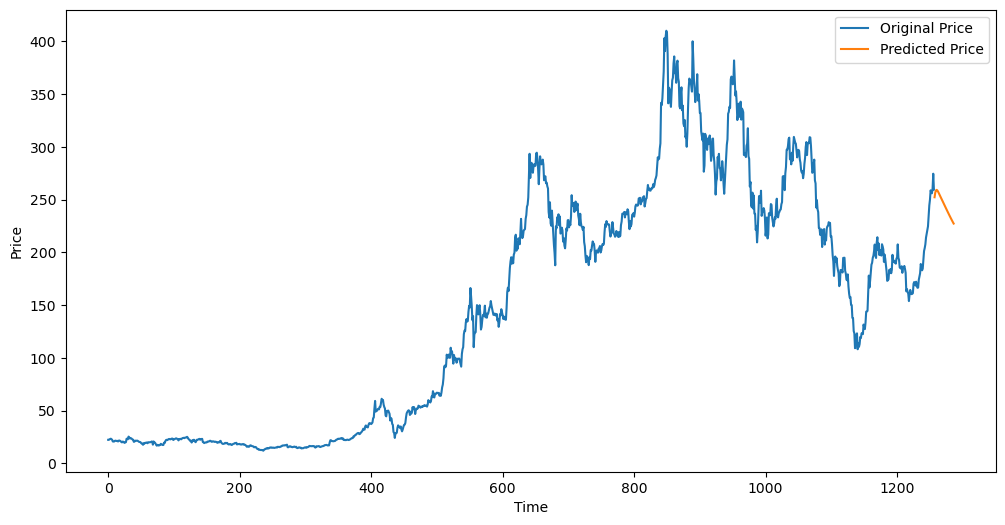

In [50]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Price')
plt.plot(range(len(data), len(data) + 30), future_predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()